In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
heart = pd.read_csv('heartData.csv')
heart = heart.drop(['target'], axis = 1)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [21]:
X = heart.drop("thal", axis=1)
y = heart["thal"]
print(X.shape, y.shape)

(1025, 12) (1025,)


In [3]:
array = heart.values
X = heart[['age','sex', 'chol', 'restecg', 'cp','fbs','thalach','exang'
          ,'oldpeak','slope','ca']]
# X = heart[['age', 'trestbps']]
# X = heart[:12].values
y = heart['thal'].values.reshape(-1, 1)

print(X.shape, y.shape)


(1025, 11) (1025, 1)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100000)
X_train


,age,sex,chol,restecg,cp,fbs,thalach,exang,oldpeak,slope,ca
263,55,0,342,1,1,0,166,0,1.2,2,0
1021,60,1,258,0,0,0,141,1,2.8,1,1
512,44,1,290,0,0,0,153,0,0.0,2,1
489,61,1,243,1,2,1,137,1,1.0,1,0
144,47,1,204,1,0,0,143,0,0.1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
942,69,0,239,1,3,0,151,0,1.8,2,2
475,57,1,126,1,2,1,173,0,0.2,2,1
747,60,1,230,1,0,1,160,1,1.4,2,2
442,57,1,274,1,0,0,88,1,1.2,1,1


In [5]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [6]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled =y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

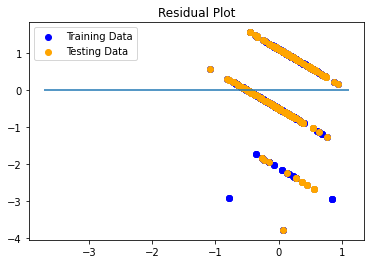

In [8]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.889548454803871, R2: 0.0676866101858642


In [10]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8847257972791779, R2: 0.07274111639120706


In [11]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.8895468929856662, R2: 0.06768824708829135


In [12]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8863473758116426, R2: 0.07104158066576383


### Classification Model

### Logistic Regression

In [13]:
# Create a Logistic Regression Model and
# Fit (train) or model using the training data

In [14]:
m1 = 'Logistic Regression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/cy/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/cy/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [15]:
# Validate the model using the test data

In [16]:
print(f"Training Data Score: {logreg.score(X_train, y_train)}")
print(f"Testing Data Score: {logreg.score(X_test, y_test)}")

Training Data Score: 0.6979166666666666
Testing Data Score: 0.6964980544747081


In [17]:
# Dictionary of classification report
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report
ypred_logreg = logreg.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, ypred_logreg)
cr=classification_report(y_test, ypred_logreg)
lr_acc_score = accuracy_score(y_test, ypred_logreg)

print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(cr)

confussion matrix
[[  0   0   0   1]
 [  0   0   3  12]
 [  0   0 108  23]
 [  0   1  38  71]]


Accuracy of Logistic Regression: 69.64980544747081 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        15
           2       0.72      0.82      0.77       131
           3       0.66      0.65      0.65       110

    accuracy                           0.70       257
   macro avg       0.35      0.37      0.36       257
weighted avg       0.65      0.70      0.67       257



/Users/cy/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cy/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cy/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

### Random forest Classifier

In [18]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

clf.score(X_test, y_test)

1.0

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/Users/cy/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.0